In [1]:
import math,copy
import numpy as np
import matplotlib.pyplot as plt

Lets consider a small dataset for understanding

In [2]:
x_train = np.array([1.0,2.0])
y_train = np.array([300.0,500.0])

Lets compute the cost first

𝐽(𝑤,𝑏)=1/2𝑚*(∑𝑖=0 to 𝑚−1 (𝑓𝑤,𝑏(𝑥(𝑖))−𝑦(𝑖))**2)

In [3]:
def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost =cost + (f_wb - y[i])**2
    total_cost = 1/(2*m) * cost
    return total_cost
    

Now lets look at gradient descent:

repeat untill convergence : {

    w = w - alpha * dJ(w,b)/dw
    
    b = b - alpha * dJ(w,b)/db
    }
    
Further,

    ∂𝐽(𝑤,𝑏)/∂𝑤 = = 1/𝑚 ∑𝑖=0 to 𝑚−1(𝑓𝑤,𝑏(𝑥(𝑖))−𝑦(𝑖))𝑥(𝑖)
    
    ∂𝐽(𝑤,𝑏)/∂𝑏 = 1/𝑚 ∑𝑖=0 to 𝑚−1(𝑓𝑤,𝑏(𝑥(𝑖))−𝑦(𝑖))

In [5]:
def compute_gradient(x,y,w,b):
    dj_dw = 0;
    dj_db = 0;
    m = x.shape[0]
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb  - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw,dj_db

Now we iterate over the gradient_descent and constantly updating w and b to find the optimal w and b

In [10]:
def gradient_descent(x,y,w_in,b_in,alpha,num_iters,cost_function,compute_gradient):
    J_history = []
    p_history = []
    w = w_in
    b = b_in
    
#     Calculate the gradient using the compute_gradient function
    for i in range(num_iters):
        dj_dw,dj_db = compute_gradient(x,y,w,b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        if(i < 10000):
                J_history.append(compute_cost(x,y,w,b))
                p_history.append([w,b])
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iterations {i:4}:Cost {J_history[-1]:0.2e}",
                 f"dj_dw : {dj_dw : 0.3e},dj_db : {dj_db : 0.3e}",
                 f"w:{w:0.3e}, b : {b:0.5e}")
    return w,b,J_history,p_history
    

Now letsfill the arguements of the gradient_descent function with appropriate values

In [15]:
w_init = 0
b_init = 0
iterations = 10000
tmp_alpha = 1.0e-2
w_final,b_final,J_hist,p_hist = gradient_descent(x_train,y_train,w_init,b_init,tmp_alpha,iterations,compute_cost,compute_gradient)
print(f"w : {w_final : 4.4f} , b : {b_final : 4.5f} ")

Iterations    0:Cost 7.93e+04 dj_dw : -6.500e+02,dj_db : -4.000e+02 w:6.500e+00, b : 4.00000e+00
Iterations 1000:Cost 3.41e+00 dj_dw : -3.712e-01,dj_db :  6.007e-01 w:1.949e+02, b : 1.08228e+02
Iterations 2000:Cost 7.93e-01 dj_dw : -1.789e-01,dj_db :  2.895e-01 w:1.975e+02, b : 1.03966e+02
Iterations 3000:Cost 1.84e-01 dj_dw : -8.625e-02,dj_db :  1.396e-01 w:1.988e+02, b : 1.01912e+02
Iterations 4000:Cost 4.28e-02 dj_dw : -4.158e-02,dj_db :  6.727e-02 w:1.994e+02, b : 1.00922e+02
Iterations 5000:Cost 9.95e-03 dj_dw : -2.004e-02,dj_db :  3.243e-02 w:1.997e+02, b : 1.00444e+02
Iterations 6000:Cost 2.31e-03 dj_dw : -9.660e-03,dj_db :  1.563e-02 w:1.999e+02, b : 1.00214e+02
Iterations 7000:Cost 5.37e-04 dj_dw : -4.657e-03,dj_db :  7.535e-03 w:1.999e+02, b : 1.00103e+02
Iterations 8000:Cost 1.25e-04 dj_dw : -2.245e-03,dj_db :  3.632e-03 w:2.000e+02, b : 1.00050e+02
Iterations 9000:Cost 2.90e-05 dj_dw : -1.082e-03,dj_db :  1.751e-03 w:2.000e+02, b : 1.00024e+02
w :  199.9929 , b :  100.01157

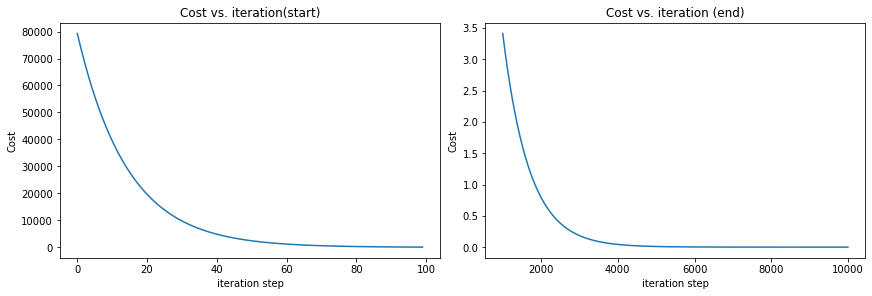

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

Now lets make prediction with the w_final and b_final and see what results we get:

In [17]:
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars
